In [ ]:
!apt install unzip
!unzip '/content/data.zip' -d '/content/data'

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/data/River_1449.jpg  
  inflating: /content/data/data/River_145.jpg  
  inflating: /content/data/data/River_1450.jpg  
  inflating: /content/data/data/River_1451.jpg  
  inflating: /content/data/data/River_1452.jpg  
  inflating: /content/data/data/River_1453.jpg  
  inflating: /content/data/data/River_1454.jpg  
  inflating: /content/data/data/River_1455.jpg  
  inflating: /content/data/data/River_1456.jpg  
  inflating: /content/data/data/River_1457.jpg  
  inflating: /content/data/data/River_1458.jpg  
  inflating: /content/data/data/River_1459.jpg  
  inflating: /content/data/data/River_146.jpg  
  inflating: /content/data/data/River_1460.jpg  
  inflating: /content/data/data/River_1461.jpg  
  inflating: /content/data/data/River_1462.jpg  
  inflating: /content/data/data/River_1463.jpg  
  inflating: /content/data/data/River_1464.jpg  
  inflating: /content/data/data/River_1465.jpg  
  inflating: /conten

In [ ]:
import tensorflow as tf
print(tf.__version__)
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from PIL import Image
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os


2.4.1


In [ ]:
directory='/content/data/data/'
def data_label():
 
  samples=[]
  labels=[]

  for filename in os.listdir(directory):
       
    image_orig=Image.open('/content/data/data/'+filename,'r')
    img=np.array(image_orig)
    name_split=filename.strip().split('.')
    split=name_split[0].split('_')
    labels.append(split[0])
    samples.append(img)

  return  samples,labels
 
samples,labels=data_label()
print(len(samples))
print(len(labels))
   

27000
27000


[1 0 0 0 0 0 0 0 0 0]
10


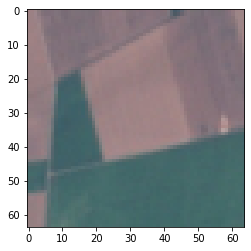

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
samples = np.array(samples,dtype='float' )/255
labels = np.array(labels)
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
samples.shape
lb.classes_

plt.imshow(samples[5])
print(labels[5])
print(len(lb.classes_))

In [ ]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy = train_test_split(samples, labels, test_size=0.2, random_state=42)

In [ ]:
trainx=trainx.reshape(trainx.shape[0],64,64,3)
testx=testx.reshape(testx.shape[0],64,64,3)


In [ ]:
aug = ImageDataGenerator( rotation_range=25, width_shift_range=0.1, 
                         height_shift_range=0.1, shear_range=0.2,
                         zoom_range=0.2, horizontal_flip=True,fill_mode='nearest')

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import utils as np_utils
from tensorflow.keras import backend 
img_dims=(64,64,3)
batch_size=64
epoch=50

In [ ]:
!pip install keras-tuner==1.0.0

In [ ]:
from kerastuner.tuners import BayesianOptimization
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
trainx.shape[1:]

(64, 64, 3)

In [ ]:
classes = len(lb.classes_)
def build(hp):
  classes = len(lb.classes_)
  model = keras.models.Sequential()
  # CNN BLOCK
  model.add(Conv2D(hp.Int('input_units',32,1024,32),(3,3), 
                     input_shape=trainx.shape[1:]))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(3, 3)))
  model.add(Dropout(hp.Choice('dropout',[0.1,0.25,0.5])))
    

  for i in range(hp.Int("n_cnn_layers",1,6)):
    model.add(Conv2D(hp.Int(f'conv_{i}_units',32,1024,32),(3,3)))
    model.add(Activation('relu'))
    model.add(Dropout(hp.Choice(f'dropout_{i}',[0.1,0.25,0.5])))

     
   
   

  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors  

    # DENSE BLOCK
  for j in range(hp.Int("n_dense_layers",1,3)):
    model.add(Dense(hp.Int(f'dense_{j}_units',32,1024,32)))
    model.add(Activation("relu"))
    model.add(Dropout(hp.Choice('dropout',[0.1,0.25,0.5])))   

    
  model.add(Dense(classes))
  model.add(Activation("softmax"))
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
    

    

  return model

In [ ]:
tuner=BayesianOptimization(build,objective='val_accuracy',
    max_trials=10,executions_per_trial=2)

tuner.search(x=trainx,
             y=trainy,
             epochs=20,
             batch_size=256,
             validation_data=(testx,testy))

INFO:tensorflow:Reloading Oracle from ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
Epoch 1/20
85/85 [==============================] - 59s 552ms/step - loss: 14256.7485 - accuracy: 0.1022 - val_loss: 2.2949 - val_accuracy: 0.1102
Epoch 2/20
85/85 [==============================] - 41s 487ms/step - loss: 2.2973 - accuracy: 0.1094 - val_loss: 2.2938 - val_accuracy: 0.1157
Epoch 3/20
85/85 [==============================] - 41s 487ms/step - loss: 2.2979 - accuracy: 0.1087 - val_loss: 2.2937 - val_accuracy: 0.1157
Epoch 4/20
85/85 [==============================] - 41s 487ms/step - loss: 2.2968 - accuracy: 0.1061 - val_loss: 2.2946 - val_accuracy: 0.1102
Epoch 5/20
85/85 [==============================] - 41s 487ms/step - loss: 2.2972 - accuracy: 0.1081 - val_loss: 2.2939 - val_accuracy: 0.1094
Epoch 6/20
85/85 [==============================] - 41s 487ms/step - loss: 2.2957 - accuracy: 0.1127 - val_loss: 2.2942 - val_accuracy: 0.1102
E

Epoch 1/20
85/85 [==============================] - 41s 387ms/step - loss: 751.1246 - accuracy: 0.1570 - val_loss: 1.9948 - val_accuracy: 0.2181
Epoch 2/20
85/85 [==============================] - 29s 342ms/step - loss: 1.8740 - accuracy: 0.2556 - val_loss: 1.7552 - val_accuracy: 0.2763
Epoch 3/20
85/85 [==============================] - 29s 342ms/step - loss: 1.8182 - accuracy: 0.2721 - val_loss: 1.7393 - val_accuracy: 0.2837
Epoch 4/20
85/85 [==============================] - 29s 342ms/step - loss: 1.7610 - accuracy: 0.2923 - val_loss: 1.6743 - val_accuracy: 0.3083
Epoch 5/20
85/85 [==============================] - 29s 342ms/step - loss: 1.7316 - accuracy: 0.3068 - val_loss: 1.6892 - val_accuracy: 0.2922
Epoch 6/20
85/85 [==============================] - 29s 342ms/step - loss: 1.7215 - accuracy: 0.3023 - val_loss: 1.6464 - val_accuracy: 0.3111
Epoch 7/20
85/85 [==============================] - 29s 341ms/step - loss: 1.7014 - accuracy: 0.3067 - val_loss: 1.6265 - val_accuracy: 0.31

Epoch 1/20
85/85 [==============================] - 14s 130ms/step - loss: 1.9359 - accuracy: 0.2434 - val_loss: 1.2265 - val_accuracy: 0.4904
Epoch 2/20
85/85 [==============================] - 10s 115ms/step - loss: 1.2104 - accuracy: 0.5120 - val_loss: 1.0436 - val_accuracy: 0.5841
Epoch 3/20
85/85 [==============================] - 10s 115ms/step - loss: 1.0374 - accuracy: 0.6055 - val_loss: 0.8744 - val_accuracy: 0.6706
Epoch 4/20
85/85 [==============================] - 10s 116ms/step - loss: 0.7946 - accuracy: 0.7170 - val_loss: 0.6390 - val_accuracy: 0.7707
Epoch 5/20
85/85 [==============================] - 10s 115ms/step - loss: 0.6798 - accuracy: 0.7564 - val_loss: 0.5833 - val_accuracy: 0.7874
Epoch 6/20
85/85 [==============================] - 10s 114ms/step - loss: 0.6454 - accuracy: 0.7660 - val_loss: 0.5122 - val_accuracy: 0.8163
Epoch 7/20
85/85 [==============================] - 10s 114ms/step - loss: 0.5704 - accuracy: 0.7945 - val_loss: 0.5610 - val_accuracy: 0.8033

Epoch 1/20
85/85 [==============================] - 21s 208ms/step - loss: 2.2904 - accuracy: 0.1674 - val_loss: 1.8049 - val_accuracy: 0.3050
Epoch 2/20
85/85 [==============================] - 16s 189ms/step - loss: 1.7547 - accuracy: 0.3184 - val_loss: 1.6878 - val_accuracy: 0.3606
Epoch 3/20
85/85 [==============================] - 16s 190ms/step - loss: 1.5746 - accuracy: 0.3933 - val_loss: 1.3456 - val_accuracy: 0.5226
Epoch 4/20
85/85 [==============================] - 16s 190ms/step - loss: 1.2634 - accuracy: 0.5326 - val_loss: 1.5089 - val_accuracy: 0.4794
Epoch 5/20
85/85 [==============================] - 16s 190ms/step - loss: 1.0559 - accuracy: 0.6178 - val_loss: 0.8284 - val_accuracy: 0.7137
Epoch 6/20
85/85 [==============================] - 16s 188ms/step - loss: 0.8589 - accuracy: 0.6911 - val_loss: 1.0373 - val_accuracy: 0.6094
Epoch 7/20
85/85 [==============================] - 16s 189ms/step - loss: 0.8040 - accuracy: 0.7109 - val_loss: 0.7396 - val_accuracy: 0.7367

Epoch 1/20
85/85 [==============================] - 26s 244ms/step - loss: 27880.5243 - accuracy: 0.1063 - val_loss: 2.2942 - val_accuracy: 0.1157
Epoch 2/20
85/85 [==============================] - 18s 213ms/step - loss: 2.2952 - accuracy: 0.1087 - val_loss: 2.2935 - val_accuracy: 0.1157
Epoch 3/20
85/85 [==============================] - 18s 212ms/step - loss: 2.2954 - accuracy: 0.1096 - val_loss: 2.2938 - val_accuracy: 0.1131
Epoch 4/20
85/85 [==============================] - 18s 212ms/step - loss: 2.2951 - accuracy: 0.1046 - val_loss: 2.2937 - val_accuracy: 0.1102
Epoch 5/20
85/85 [==============================] - 18s 212ms/step - loss: 2.2954 - accuracy: 0.1089 - val_loss: 2.2945 - val_accuracy: 0.1094
Epoch 6/20
85/85 [==============================] - 18s 211ms/step - loss: 2.2971 - accuracy: 0.1044 - val_loss: 2.2938 - val_accuracy: 0.1102
Epoch 7/20
85/85 [==============================] - 18s 212ms/step - loss: 2.2957 - accuracy: 0.1119 - val_loss: 2.2937 - val_accuracy: 0.

Epoch 1/20
85/85 [==============================] - 39s 369ms/step - loss: 9076.4323 - accuracy: 0.1096 - val_loss: 2.2945 - val_accuracy: 0.1131
Epoch 2/20
85/85 [==============================] - 28s 326ms/step - loss: 2.2956 - accuracy: 0.1139 - val_loss: 2.2954 - val_accuracy: 0.1131
Epoch 3/20
85/85 [==============================] - 28s 325ms/step - loss: 2.2960 - accuracy: 0.1077 - val_loss: 2.2938 - val_accuracy: 0.1131
Epoch 4/20
85/85 [==============================] - 28s 325ms/step - loss: 2.2962 - accuracy: 0.1086 - val_loss: 2.2936 - val_accuracy: 0.1131
Epoch 5/20
85/85 [==============================] - 28s 325ms/step - loss: 2.2956 - accuracy: 0.1094 - val_loss: 2.2938 - val_accuracy: 0.1131
Epoch 6/20
85/85 [==============================] - 28s 326ms/step - loss: 2.2938 - accuracy: 0.1094 - val_loss: 2.2940 - val_accuracy: 0.1157
Epoch 7/20
85/85 [==============================] - 28s 325ms/step - loss: 2.2954 - accuracy: 0.1114 - val_loss: 2.2939 - val_accuracy: 0.1

Epoch 1/20
85/85 [==============================] - 18s 168ms/step - loss: 2.1743 - accuracy: 0.1704 - val_loss: 1.7837 - val_accuracy: 0.3000
Epoch 2/20
85/85 [==============================] - 12s 146ms/step - loss: 1.7091 - accuracy: 0.3049 - val_loss: 1.4927 - val_accuracy: 0.3681
Epoch 3/20
85/85 [==============================] - 12s 145ms/step - loss: 1.4866 - accuracy: 0.3832 - val_loss: 1.2614 - val_accuracy: 0.4593
Epoch 4/20
85/85 [==============================] - 12s 145ms/step - loss: 1.3096 - accuracy: 0.4627 - val_loss: 1.1439 - val_accuracy: 0.5439
Epoch 5/20
85/85 [==============================] - 12s 145ms/step - loss: 1.2285 - accuracy: 0.5130 - val_loss: 1.1181 - val_accuracy: 0.5428
Epoch 6/20
85/85 [==============================] - 12s 146ms/step - loss: 1.1171 - accuracy: 0.5700 - val_loss: 1.1575 - val_accuracy: 0.5696
Epoch 7/20
85/85 [==============================] - 12s 146ms/step - loss: 1.0445 - accuracy: 0.6060 - val_loss: 0.9022 - val_accuracy: 0.6763

Epoch 1/20
85/85 [==============================] - 34s 328ms/step - loss: 2.4069 - accuracy: 0.1488 - val_loss: 1.9078 - val_accuracy: 0.1943
Epoch 2/20
85/85 [==============================] - 25s 294ms/step - loss: 1.9666 - accuracy: 0.2209 - val_loss: 1.4725 - val_accuracy: 0.4544
Epoch 3/20
85/85 [==============================] - 25s 295ms/step - loss: 1.6281 - accuracy: 0.3620 - val_loss: 1.3337 - val_accuracy: 0.5176
Epoch 4/20
85/85 [==============================] - 25s 292ms/step - loss: 1.4661 - accuracy: 0.4344 - val_loss: 1.3026 - val_accuracy: 0.5172
Epoch 5/20
85/85 [==============================] - 25s 293ms/step - loss: 1.3618 - accuracy: 0.4898 - val_loss: 1.1649 - val_accuracy: 0.5913
Epoch 6/20
85/85 [==============================] - 25s 293ms/step - loss: 1.3271 - accuracy: 0.5251 - val_loss: 0.9366 - val_accuracy: 0.6609
Epoch 7/20
85/85 [==============================] - 25s 293ms/step - loss: 1.1915 - accuracy: 0.5833 - val_loss: 0.9560 - val_accuracy: 0.6585

Epoch 1/20
85/85 [==============================] - 47s 450ms/step - loss: 2.6687 - accuracy: 0.1706 - val_loss: 1.4869 - val_accuracy: 0.4035
Epoch 2/20
85/85 [==============================] - 34s 397ms/step - loss: 1.4409 - accuracy: 0.4337 - val_loss: 1.4491 - val_accuracy: 0.4450
Epoch 3/20
85/85 [==============================] - 34s 397ms/step - loss: 1.2318 - accuracy: 0.5339 - val_loss: 1.0129 - val_accuracy: 0.6219
Epoch 4/20
85/85 [==============================] - 34s 397ms/step - loss: 1.0650 - accuracy: 0.6006 - val_loss: 0.9723 - val_accuracy: 0.6457
Epoch 5/20
85/85 [==============================] - 34s 395ms/step - loss: 0.9826 - accuracy: 0.6297 - val_loss: 0.9242 - val_accuracy: 0.6409
Epoch 6/20
85/85 [==============================] - 33s 394ms/step - loss: 0.8913 - accuracy: 0.6716 - val_loss: 0.7871 - val_accuracy: 0.7069
Epoch 7/20
85/85 [==============================] - 34s 396ms/step - loss: 0.7896 - accuracy: 0.7151 - val_loss: 0.7116 - val_accuracy: 0.7404

Epoch 1/20
85/85 [==============================] - 34s 329ms/step - loss: 3.4654 - accuracy: 0.1999 - val_loss: 1.8474 - val_accuracy: 0.3687
Epoch 2/20
85/85 [==============================] - 25s 293ms/step - loss: 1.4184 - accuracy: 0.4688 - val_loss: 1.0943 - val_accuracy: 0.5926
Epoch 3/20
85/85 [==============================] - 25s 291ms/step - loss: 1.1250 - accuracy: 0.5825 - val_loss: 0.9241 - val_accuracy: 0.6546
Epoch 4/20
85/85 [==============================] - 25s 293ms/step - loss: 0.9444 - accuracy: 0.6529 - val_loss: 1.0793 - val_accuracy: 0.6091
Epoch 5/20
85/85 [==============================] - 25s 293ms/step - loss: 0.9803 - accuracy: 0.6380 - val_loss: 0.7856 - val_accuracy: 0.7109
Epoch 6/20
85/85 [==============================] - 25s 292ms/step - loss: 0.7640 - accuracy: 0.7191 - val_loss: 0.6461 - val_accuracy: 0.7650
Epoch 7/20
85/85 [==============================] - 25s 294ms/step - loss: 0.7044 - accuracy: 0.7451 - val_loss: 0.7355 - val_accuracy: 0.7361

In [ ]:
tuner=BayesianOptimization(build,objective='val_accuracy',
    max_trials=5,executions_per_trial=1)

tuner.search(x=trainx,
             y=trainy,
             epochs=20,
             batch_size=256,
             validation_data=(testx,testy))

INFO:tensorflow:Reloading Oracle from ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
Epoch 1/20
85/85 [==============================] - 65s 561ms/step - loss: 2.3329 - accuracy: 0.1548 - val_loss: 2.3972 - val_accuracy: 0.1533
Epoch 2/20
85/85 [==============================] - 40s 474ms/step - loss: 1.6982 - accuracy: 0.2989 - val_loss: 1.7210 - val_accuracy: 0.2580
Epoch 3/20
85/85 [==============================] - 40s 470ms/step - loss: 1.4627 - accuracy: 0.3948 - val_loss: 1.6882 - val_accuracy: 0.3609
Epoch 4/20
85/85 [==============================] - 40s 472ms/step - loss: 1.3203 - accuracy: 0.4870 - val_loss: 1.1734 - val_accuracy: 0.5580
Epoch 5/20
85/85 [==============================] - 40s 472ms/step - loss: 1.2519 - accuracy: 0.5358 - val_loss: 1.1172 - val_accuracy: 0.5889
Epoch 6/20
85/85 [==============================] - 40s 471ms/step - loss: 1.0838 - accuracy: 0.6129 - val_loss: 1.1771 - val_accuracy: 0.5580
Epoch

Epoch 1/20
85/85 [==============================] - 41s 394ms/step - loss: 1.9413 - accuracy: 0.2546 - val_loss: 1.2998 - val_accuracy: 0.5385
Epoch 2/20
85/85 [==============================] - 29s 345ms/step - loss: 1.3143 - accuracy: 0.5033 - val_loss: 1.0794 - val_accuracy: 0.6270
Epoch 3/20
85/85 [==============================] - 29s 345ms/step - loss: 1.1477 - accuracy: 0.5878 - val_loss: 0.9743 - val_accuracy: 0.6674
Epoch 4/20
85/85 [==============================] - 29s 345ms/step - loss: 1.0095 - accuracy: 0.6464 - val_loss: 0.8985 - val_accuracy: 0.6789
Epoch 5/20
85/85 [==============================] - 29s 346ms/step - loss: 0.9216 - accuracy: 0.6698 - val_loss: 0.7631 - val_accuracy: 0.7344
Epoch 6/20
85/85 [==============================] - 29s 346ms/step - loss: 0.8337 - accuracy: 0.7041 - val_loss: 0.7127 - val_accuracy: 0.7531
Epoch 7/20
85/85 [==============================] - 29s 347ms/step - loss: 0.7869 - accuracy: 0.7254 - val_loss: 0.6704 - val_accuracy: 0.7654

Epoch 1/20
85/85 [==============================] - 31s 316ms/step - loss: 2.1623 - accuracy: 0.1928 - val_loss: 1.7268 - val_accuracy: 0.3450
Epoch 2/20
85/85 [==============================] - 25s 289ms/step - loss: 1.6935 - accuracy: 0.3548 - val_loss: 1.4072 - val_accuracy: 0.4469
Epoch 3/20
85/85 [==============================] - 24s 287ms/step - loss: 1.3719 - accuracy: 0.4864 - val_loss: 1.1120 - val_accuracy: 0.5880
Epoch 4/20
85/85 [==============================] - 24s 288ms/step - loss: 1.1286 - accuracy: 0.5896 - val_loss: 0.9718 - val_accuracy: 0.6491
Epoch 5/20
85/85 [==============================] - 25s 289ms/step - loss: 1.0290 - accuracy: 0.6282 - val_loss: 0.7989 - val_accuracy: 0.7169
Epoch 6/20
85/85 [==============================] - 25s 289ms/step - loss: 0.9399 - accuracy: 0.6675 - val_loss: 0.9612 - val_accuracy: 0.6620
Epoch 7/20
85/85 [==============================] - 25s 289ms/step - loss: 0.8835 - accuracy: 0.6903 - val_loss: 0.7208 - val_accuracy: 0.7435

Epoch 1/20
85/85 [==============================] - 94s 865ms/step - loss: 2.1991 - accuracy: 0.1334 - val_loss: 1.5211 - val_accuracy: 0.3546
Epoch 2/20
85/85 [==============================] - 62s 731ms/step - loss: 1.4923 - accuracy: 0.3975 - val_loss: 1.1990 - val_accuracy: 0.5474
Epoch 3/20
85/85 [==============================] - 62s 731ms/step - loss: 1.2496 - accuracy: 0.5045 - val_loss: 1.0346 - val_accuracy: 0.6152
Epoch 4/20
85/85 [==============================] - 62s 732ms/step - loss: 1.1052 - accuracy: 0.5786 - val_loss: 0.9135 - val_accuracy: 0.6496
Epoch 5/20
85/85 [==============================] - 62s 734ms/step - loss: 0.9874 - accuracy: 0.6290 - val_loss: 0.7289 - val_accuracy: 0.7387
Epoch 6/20
85/85 [==============================] - 62s 734ms/step - loss: 0.8735 - accuracy: 0.6850 - val_loss: 1.0923 - val_accuracy: 0.6265
Epoch 7/20
85/85 [==============================] - 62s 734ms/step - loss: 0.7381 - accuracy: 0.7336 - val_loss: 0.6011 - val_accuracy: 0.7830

Epoch 1/20
85/85 [==============================] - 62s 604ms/step - loss: 2.1679 - accuracy: 0.1531 - val_loss: 1.7290 - val_accuracy: 0.3031
Epoch 2/20
85/85 [==============================] - 46s 538ms/step - loss: 1.6598 - accuracy: 0.3339 - val_loss: 1.1687 - val_accuracy: 0.5531
Epoch 3/20
85/85 [==============================] - 46s 538ms/step - loss: 1.2940 - accuracy: 0.4994 - val_loss: 0.9933 - val_accuracy: 0.6050
Epoch 4/20
85/85 [==============================] - 46s 539ms/step - loss: 1.1450 - accuracy: 0.5587 - val_loss: 1.2033 - val_accuracy: 0.5648
Epoch 5/20
85/85 [==============================] - 46s 540ms/step - loss: 1.0557 - accuracy: 0.6177 - val_loss: 1.6781 - val_accuracy: 0.4919
Epoch 6/20
85/85 [==============================] - 46s 539ms/step - loss: 1.0154 - accuracy: 0.6429 - val_loss: 0.9575 - val_accuracy: 0.6761
Epoch 7/20
85/85 [==============================] - 46s 540ms/step - loss: 0.7830 - accuracy: 0.7258 - val_loss: 0.7713 - val_accuracy: 0.7243

Epoch 1/20
85/85 [==============================] - 34s 330ms/step - loss: 1368.7060 - accuracy: 0.1049 - val_loss: 2.2949 - val_accuracy: 0.1157


In [ ]:
tuner=BayesianOptimization(build,objective='val_accuracy',
    max_trials=50,executions_per_trial=1)

tuner.search(x=trainx,
             y=trainy,
             epochs=20,
             batch_size=256,
             validation_data=(testx,testy))

INFO:tensorflow:Reloading Oracle from ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
Epoch 1/20
85/85 [==============================] - 63s 310ms/step - loss: 4148.2301 - accuracy: 0.1115 - val_loss: 2.2954 - val_accuracy: 0.1157
Epoch 2/20
85/85 [==============================] - 24s 281ms/step - loss: 2.2966 - accuracy: 0.1084 - val_loss: 2.2942 - val_accuracy: 0.1131
Epoch 3/20
85/85 [==============================] - 24s 283ms/step - loss: 2.2971 - accuracy: 0.1096 - val_loss: 2.2941 - val_accuracy: 0.1102
Epoch 4/20
85/85 [==============================] - 24s 286ms/step - loss: 2.2960 - accuracy: 0.1062 - val_loss: 2.2939 - val_accuracy: 0.1131
Epoch 5/20
85/85 [==============================] - 24s 288ms/step - loss: 2.2955 - accuracy: 0.1142 - val_loss: 2.2939 - val_accuracy: 0.1131
Epoch 6/20
85/85 [==============================] - 25s 290ms/step - loss: 2.2965 - accuracy: 0.1062 - val_loss: 2.2936 - val_accuracy: 0.1094
Ep

Epoch 1/20
85/85 [==============================] - 56s 504ms/step - loss: 3.0086 - accuracy: 0.1989 - val_loss: 1.5711 - val_accuracy: 0.4291
Epoch 2/20
85/85 [==============================] - 36s 427ms/step - loss: 1.5711 - accuracy: 0.4107 - val_loss: 1.1556 - val_accuracy: 0.5420
Epoch 3/20
85/85 [==============================] - 35s 414ms/step - loss: 1.1582 - accuracy: 0.5680 - val_loss: 0.9795 - val_accuracy: 0.6437
Epoch 4/20
85/85 [==============================] - 35s 417ms/step - loss: 0.9597 - accuracy: 0.6538 - val_loss: 0.8760 - val_accuracy: 0.6876
Epoch 5/20
85/85 [==============================] - 36s 418ms/step - loss: 0.8624 - accuracy: 0.6881 - val_loss: 0.6604 - val_accuracy: 0.7596
Epoch 6/20
85/85 [==============================] - 36s 421ms/step - loss: 0.8156 - accuracy: 0.7020 - val_loss: 0.6036 - val_accuracy: 0.7876
Epoch 7/20
85/85 [==============================] - 35s 413ms/step - loss: 0.6573 - accuracy: 0.7632 - val_loss: 0.5887 - val_accuracy: 0.7937

Epoch 1/20
85/85 [==============================] - 83s 784ms/step - loss: 197.2110 - accuracy: 0.1035 - val_loss: 2.2939 - val_accuracy: 0.1131
Epoch 2/20
85/85 [==============================] - 59s 699ms/step - loss: 2.2965 - accuracy: 0.1107 - val_loss: 2.2936 - val_accuracy: 0.1131
Epoch 3/20
85/85 [==============================] - 58s 689ms/step - loss: 2.2947 - accuracy: 0.1110 - val_loss: 2.2940 - val_accuracy: 0.1157
Epoch 4/20
85/85 [==============================] - 59s 696ms/step - loss: 2.2960 - accuracy: 0.1123 - val_loss: 2.2938 - val_accuracy: 0.1094
Epoch 5/20
85/85 [==============================] - 59s 690ms/step - loss: 2.2962 - accuracy: 0.1078 - val_loss: 2.2939 - val_accuracy: 0.1094
Epoch 6/20
85/85 [==============================] - 59s 690ms/step - loss: 2.2952 - accuracy: 0.1083 - val_loss: 2.2938 - val_accuracy: 0.1102
Epoch 7/20
85/85 [==============================] - 59s 693ms/step - loss: 2.2959 - accuracy: 0.1066 - val_loss: 2.2938 - val_accuracy: 0.11

Epoch 1/20
85/85 [==============================] - 38s 368ms/step - loss: 2.0656 - accuracy: 0.1871 - val_loss: 1.3405 - val_accuracy: 0.4441
Epoch 2/20
85/85 [==============================] - 28s 326ms/step - loss: 1.2876 - accuracy: 0.4880 - val_loss: 1.2083 - val_accuracy: 0.5239
Epoch 3/20
85/85 [==============================] - 28s 327ms/step - loss: 1.0825 - accuracy: 0.5876 - val_loss: 0.8932 - val_accuracy: 0.6793
Epoch 4/20
85/85 [==============================] - 28s 328ms/step - loss: 0.8994 - accuracy: 0.6631 - val_loss: 0.8622 - val_accuracy: 0.6907
Epoch 5/20
85/85 [==============================] - 28s 325ms/step - loss: 0.7971 - accuracy: 0.7111 - val_loss: 1.2744 - val_accuracy: 0.5880
Epoch 6/20
85/85 [==============================] - 28s 326ms/step - loss: 0.7240 - accuracy: 0.7314 - val_loss: 0.7266 - val_accuracy: 0.7424
Epoch 7/20
85/85 [==============================] - 28s 326ms/step - loss: 0.6961 - accuracy: 0.7415 - val_loss: 0.8820 - val_accuracy: 0.6850

Epoch 1/20
85/85 [==============================] - 99s 878ms/step - loss: 181714.9825 - accuracy: 0.1165 - val_loss: 2.2942 - val_accuracy: 0.1157
Epoch 2/20
85/85 [==============================] - 62s 734ms/step - loss: 2.2967 - accuracy: 0.1100 - val_loss: 2.2938 - val_accuracy: 0.1157
Epoch 3/20
85/85 [==============================] - 62s 733ms/step - loss: 2.2954 - accuracy: 0.1116 - val_loss: 2.2951 - val_accuracy: 0.1102
Epoch 4/20
85/85 [==============================] - 63s 736ms/step - loss: 2.2955 - accuracy: 0.1129 - val_loss: 2.2936 - val_accuracy: 0.1094
Epoch 5/20
85/85 [==============================] - 62s 733ms/step - loss: 2.2947 - accuracy: 0.1072 - val_loss: 2.2938 - val_accuracy: 0.1102
Epoch 6/20
85/85 [==============================] - 62s 735ms/step - loss: 2.2961 - accuracy: 0.1099 - val_loss: 2.2940 - val_accuracy: 0.1102
Epoch 7/20
85/85 [==============================] - 63s 737ms/step - loss: 2.2967 - accuracy: 0.1029 - val_loss: 2.2943 - val_accuracy: 0

Epoch 1/20
85/85 [==============================] - 50s 429ms/step - loss: 10197.6443 - accuracy: 0.1063 - val_loss: 2.2953 - val_accuracy: 0.1094
Epoch 2/20
85/85 [==============================] - 31s 360ms/step - loss: 2.2962 - accuracy: 0.1111 - val_loss: 2.2944 - val_accuracy: 0.1094
Epoch 3/20
85/85 [==============================] - 31s 360ms/step - loss: 2.2946 - accuracy: 0.1141 - val_loss: 2.2946 - val_accuracy: 0.1131
Epoch 4/20
62/85 [====================>.........] - ETA: 7s - loss: 2.2946 - accuracy: 0.1155

In [ ]:
def build_model(height, width,depth, classes):
  input_shape = (height, width, depth)
  channel_dim = -1 # last position 
  if backend.image_data_format() == 'channels_first':
    input_shape = (depth, height, width)
    channel_dim = 1
    
  model = keras.models.Sequential()
  # BLOCK1
  model.add(Conv2D(32,(3,3),padding='same', input_shape=input_shape))
  model.add(Activation('relu'))
  model.add(BatchNormalization(axis=channel_dim))
  model.add(MaxPooling2D(pool_size=(3, 3)))
  

  model.add(Conv2D(64,(3,3),padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization(axis=channel_dim))
  
  model.add(Dropout(0.25))

  model.add(Conv2D(128,(3,3),padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization(axis=channel_dim))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(256,(3,3),padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization(axis=channel_dim))
  model.add(Dropout(0.5))



    # BLOCK 5
  model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
  
  model.add(Dense(1024))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=channel_dim))
  model.add(Dropout(0.5))
  
  
  
  

  model.add(Dense(classes))
  model.add(Activation("softmax"))
  
    

    
  return model

trainx=trainx.reshape(trainx.shape[0],64,64,3)
testx=testx.reshape(testx.shape[0],64,64,3)

In [ ]:
epochs_needed=[]
model =build_model(height=img_dims[0], width=img_dims[1],depth=img_dims[2],classes = len(lb.classes_))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(aug.flow(trainx, trainy, batch_size=batch_size),
                 validation_data=(testx, testy),
                 steps_per_epoch= len(trainx) // batch_size,
                 epochs=100, verbose=1)


Epoch 1/100
337/337 [==============================] - 71s 120ms/step - loss: 1.5489 - accuracy: 0.5513 - val_loss: 4.0934 - val_accuracy: 0.1996
Epoch 2/100
337/337 [==============================] - 39s 116ms/step - loss: 0.8573 - accuracy: 0.7192 - val_loss: 2.3691 - val_accuracy: 0.4730
Epoch 3/100
337/337 [==============================] - 38s 113ms/step - loss: 0.7449 - accuracy: 0.7484 - val_loss: 2.2838 - val_accuracy: 0.5570
Epoch 4/100
337/337 [==============================] - 40s 117ms/step - loss: 0.6379 - accuracy: 0.7828 - val_loss: 2.2270 - val_accuracy: 0.5974
Epoch 5/100
337/337 [==============================] - 39s 115ms/step - loss: 0.5990 - accuracy: 0.7899 - val_loss: 2.0773 - val_accuracy: 0.5606
Epoch 6/100
337/337 [==============================] - 38s 114ms/step - loss: 0.5544 - accuracy: 0.8054 - val_loss: 2.2997 - val_accuracy: 0.5193
Epoch 7/100
337/337 [==============================] - 38s 112ms/step - loss: 0.5372 - accuracy: 0.8127 - val_loss: 2.8061 -